In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dataaccessor import dataaccessor

da = dataaccessor(filename='cred.properties')
columns, data = da.extract_data('see_all')
data_res = pd.DataFrame.from_records(data, columns=columns)

data_res = data_res[['countryname','Year','TotalPopulation', 'UrbanPopulation', 'Area','CultivatedArea', 'IrrigatedPercent','IRWR']]
data_res['Value'] = data_res['UrbanPopulation']/data_res['TotalPopulation']
data_res = data_res.dropna(subset='CultivatedArea')
data_res = data_res.fillna(100)
data_res['land_value'] = data_res['CultivatedArea']/data_res['Area']*data_res['IrrigatedPercent']/100
data_res = data_res.drop(columns=['Area','TotalPopulation', 'UrbanPopulation', 'CultivatedArea', 'IrrigatedPercent'])
data_res = data_res.rename(columns={'countryname':'Area'})
data_res


,Area,Year,IRWR,Value,land_value
0,"""Afghanistan""",1962,47.15,0.089703,0.118862
1,"""Afghanistan""",1967,47.15,0.105427,0.122216
2,"""Afghanistan""",1972,47.15,0.123375,0.123242
3,"""Afghanistan""",1977,47.15,0.144031,0.123304
4,"""Afghanistan""",1982,47.15,0.169698,0.123365
...,...,...,...,...,...
198,"""United States of America""",2002,2818.00,0.794718,0.023239
199,"""United States of America""",2007,2818.00,0.802658,0.023780
200,"""United States of America""",2012,2818.00,0.809360,0.022971
201,"""United States of America""",2017,2818.00,0.818997,0.023881


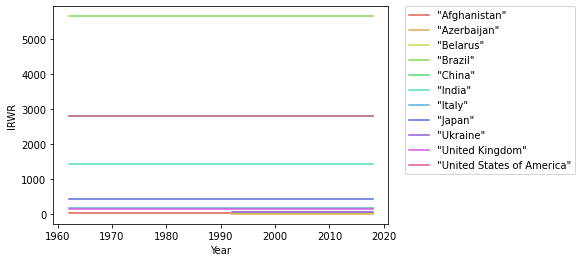

In [150]:
import seaborn as sns

data_ind = data_res['Area'].unique()
sns.set_palette(sns.color_palette())
# data.loc[('Afghanistan')]
color_palette = sns.color_palette('hls', data_ind.shape[0])
if not ('Area' in list(data_res.index.names)):
    data_res.set_index('Area', inplace=True)
fig, ax = plt.subplots()
for i, ind in enumerate(data_ind):
    data_country = data_res.loc[ind].copy()
    data_country.reset_index(inplace=True)
    sns.lineplot(data=data_country, x='Year', y='IRWR', hue='Area', palette=[color_palette[i]], ax=ax)
# data.groupby('Area').plot(kind='line',x='Year', y='Value',ax=ax)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

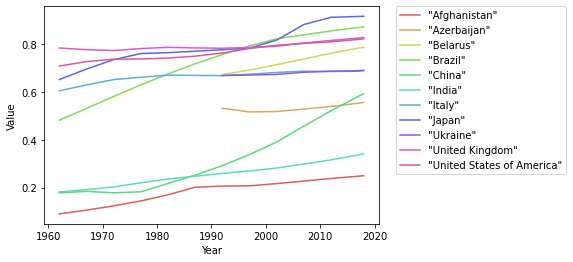

In [151]:
sns.set_palette(sns.color_palette())
# data.loc[('Afghanistan')]
color_palette = sns.color_palette('hls', data_ind.shape[0])
if not ('Area' in list(data_res.index.names)):
    data_res.set_index('Area', inplace=True)
fig, ax = plt.subplots()
for i, ind in enumerate(data_ind):
    data_country = data_res.loc[ind].copy()
    data_country.reset_index(inplace=True)
    sns.lineplot(data=data_country, x='Year', y='Value', hue='Area', palette=[color_palette[i]], ax=ax)
# data.groupby('Area').plot(kind='line',x='Year', y='Value',ax=ax)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

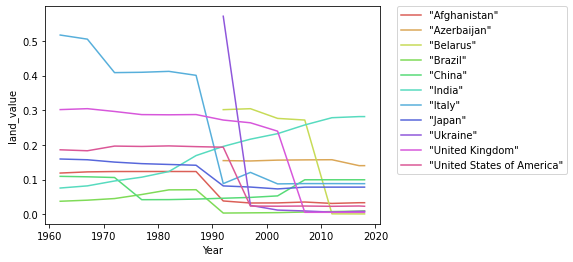

In [152]:
sns.set_palette(sns.color_palette())
# data.loc[('Afghanistan')]
color_palette = sns.color_palette('hls', data_ind.shape[0])
if not ('Area' in list(data_res.index.names)):
    data_res.set_index('Area', inplace=True)
fig, ax = plt.subplots()
for i, ind in enumerate(data_ind):
    data_country = data_res.loc[ind].copy()
    data_country.reset_index(inplace=True)
    sns.lineplot(data=data_country, x='Year', y='land_value', hue='Area', palette=[color_palette[i]], ax=ax)
# data.groupby('Area').plot(kind='line',x='Year', y='Value',ax=ax)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

In [153]:
data_res = data_res.reset_index()

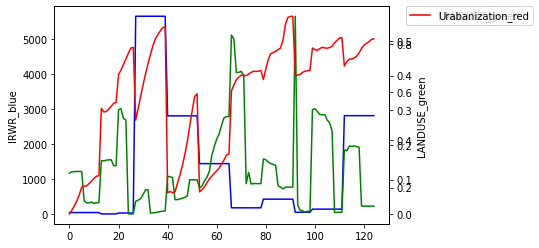

In [154]:
fig, ax = plt.subplots()
ax1 = ax.twinx()
ax2 = ax.twinx()
ax.plot(data_res.index,data_res['IRWR'],color='b', label = 'IRWR_blue')
ax1.plot(data_res.index,data_res['land_value'],color='g', label = 'LANDUSE_green')
ax2.plot(data_res.index,data_res['Value'],color='r', label = 'Urabanization_red')
ax.set_ylabel('IRWR_blue')
ax1.set_ylabel('LANDUSE_green')
# ax2.set_xlabel('Urabanization_red')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

In [155]:
data_land = data_res.drop(columns = ['Area', 'Year', 'IRWR', 'Value'])
data_urban = data_res.drop(columns = ['Area', 'Year', 'IRWR', 'land_value'])

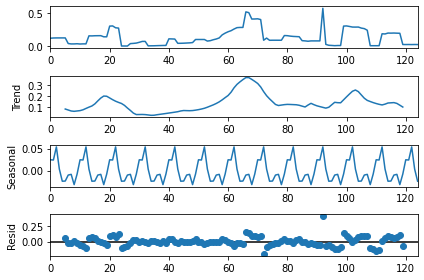

In [156]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_data_land = seasonal_decompose(data_land, model="additive",period=10)
decompose_data_land.plot();

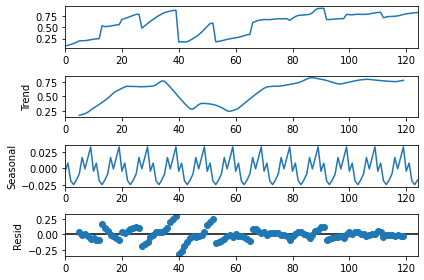

In [157]:
decompose_data_urban = seasonal_decompose(data_urban, model="additive",period=10)
decompose_data_urban.plot();

<AxesSubplot:>

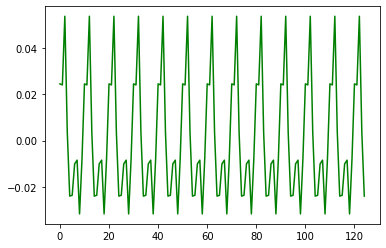

In [158]:
seasonality=decompose_data_land.seasonal
seasonality.plot(color='green')

<AxesSubplot:>

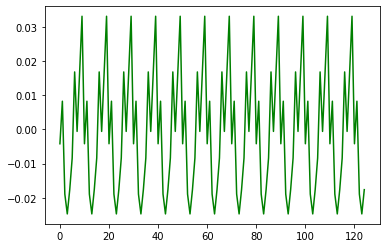

In [159]:
seasonality=decompose_data_urban.seasonal
seasonality.plot(color='green')

In [160]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(data_land.land_value, autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -4.561084849792796
2. P-Value :  0.00015227041966830833
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 124
5. Critical Values :
	 1% :  -3.484219653271961
	 5% :  -2.885145235641637
	 10% :  -2.579359138917794


In [161]:
dftest = adfuller(data_urban.Value, autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -2.564548719543611
2. P-Value :  0.10054789677316794
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 124
5. Critical Values :
	 1% :  -3.484219653271961
	 5% :  -2.885145235641637
	 10% :  -2.579359138917794


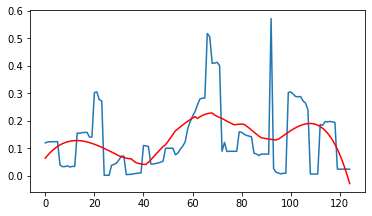

In [162]:
from scipy.signal import savgol_filter

y_filtered = savgol_filter(data_land['land_value'], 60, 3)
fig = plt.figure()
ax = fig.subplots()
p = ax.plot(data_land.index, data_land['land_value'])
p, = ax.plot(data_land.index, y_filtered, 'r')
plt.subplots_adjust(bottom=0.25)

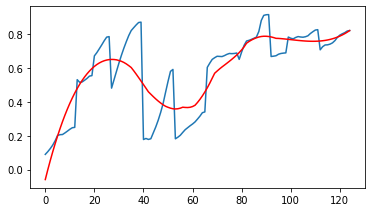

In [163]:
y_filtered = savgol_filter(data_urban['Value'], 60, 3)
fig = plt.figure()
ax = fig.subplots()
p = ax.plot(data_urban.index, data_urban['Value'])
p, = ax.plot(data_urban.index, y_filtered, 'r')
plt.subplots_adjust(bottom=0.25)

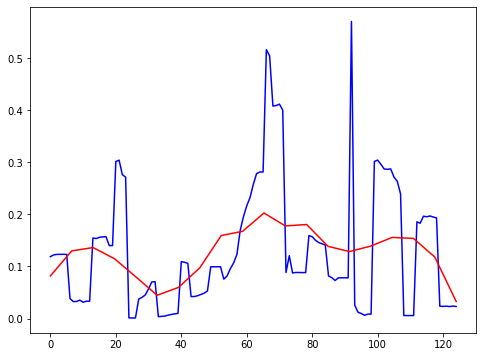

In [164]:
from scipy import interpolate
f = interpolate.interp1d(data_land.index, data_land['land_value'], kind="linear")
x_int = np.linspace(data_land.index[0],data_land.index[-1], 20)
y_int = f(x_int)

y_filtered = savgol_filter(y_int, 10, 3)

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(data_land.index, data_land['land_value'], color='blue', label= 'Unsmoothed curve')
ax.plot(x_int, y_filtered, color="red", label= "Interpolated curve")

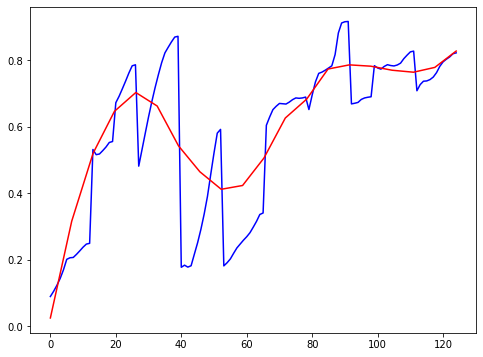

In [165]:
f = interpolate.interp1d(data_urban.index, data_urban['Value'], kind="linear")
x_int = np.linspace(data_urban.index[0],data_urban.index[-1], 20)
y_int = f(x_int)

y_filtered = savgol_filter(y_int, 10, 3)

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(data_urban.index, data_urban['Value'], color='blue', label= 'Unsmoothed curve')
ax.plot(x_int, y_filtered, color="red", label= "Interpolated curve")

In [166]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(data_res.land_value.dropna())
print('p-value: ', result[1])

result = adfuller(data_res.land_value.diff().dropna())
print('p-value: ', result[1])

result = adfuller(data_res.land_value.diff().diff().dropna())
print('p-value: ', result[1])

p-value:  0.00015227041966830833
p-value:  3.041209327712504e-26
p-value:  2.1602899150987474e-07


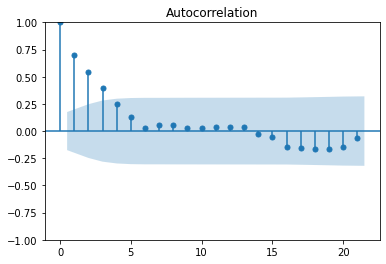

In [167]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf

X = data_land['land_value']
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
acf = plot_acf(X)

d:\labs\аналіз даних\course work\dataaccessor\pyenv\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


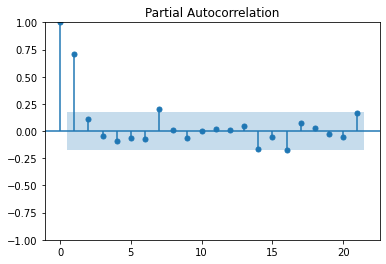

In [168]:
from statsmodels.graphics.tsaplots import plot_pacf
pacf = plot_pacf(X)

In [169]:
import statsmodels.api as sm
mod = sm.tsa.statespace.SARIMAX(data_land['land_value'], trend='c', order=(1,1,1))
res = mod.fit(disp=False)
print(res.summary())


                               SARIMAX Results                                
Dep. Variable:             land_value   No. Observations:                  125
Model:               SARIMAX(1, 1, 1)   Log Likelihood                 127.225
Date:                Sun, 19 Jun 2022   AIC                           -246.450
Time:                        18:08:41   BIC                           -235.169
Sample:                             0   HQIC                          -241.867
                                - 125                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   9.558e-05      0.000      0.221      0.825      -0.001       0.001
ar.L1          0.7083      0.090      7.841      0.000       0.531       0.885
ma.L1         -0.9998      8.072     -0.124      0.9

d:\labs\аналіз даних\course work\dataaccessor\pyenv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
d:\labs\аналіз даних\course work\dataaccessor\pyenv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
d:\labs\аналіз даних\course work\dataaccessor\pyenv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


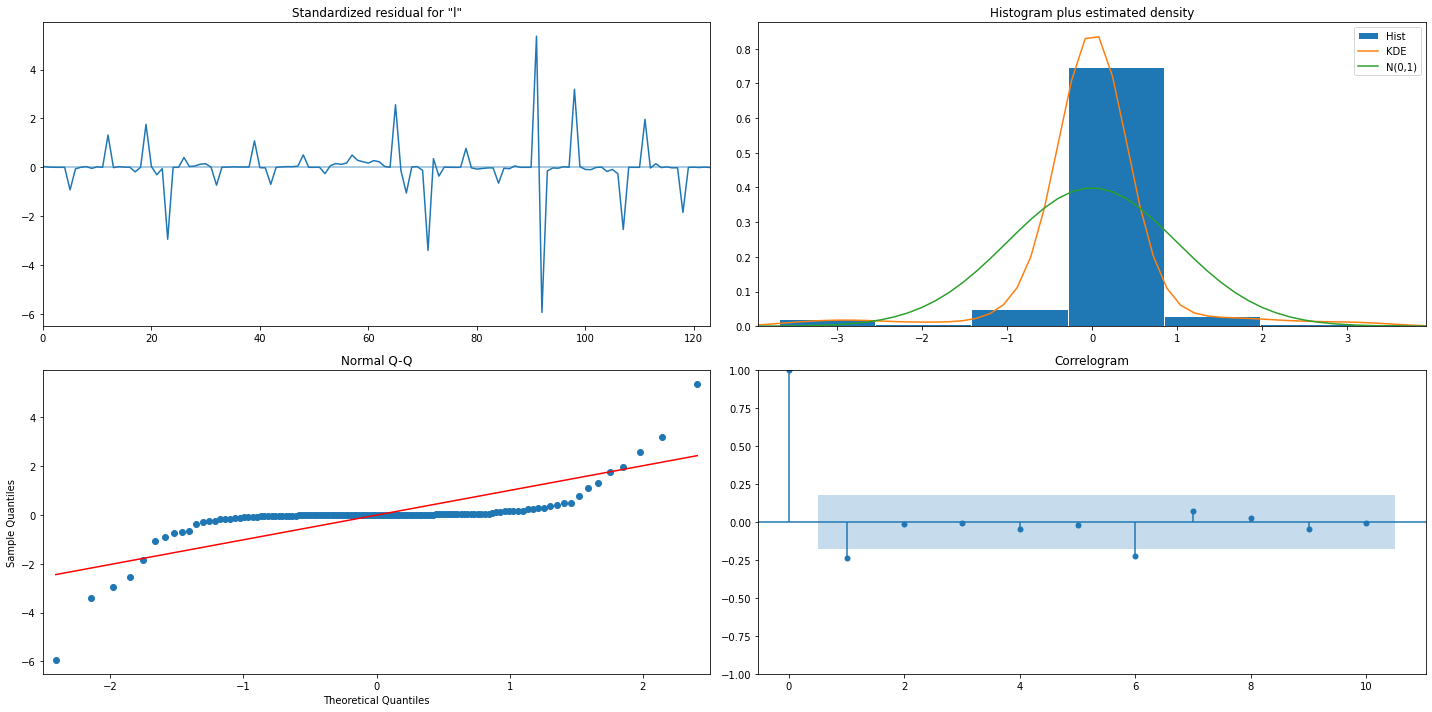

In [170]:
model = sm.tsa.statespace.SARIMAX(data_land['land_value'],exog=data_res['IRWR'], order=(2,1,2))
results=model.fit()

# Create the 4 diagostics plots
results.plot_diagnostics(figsize=(20, 10));
plt.tight_layout();

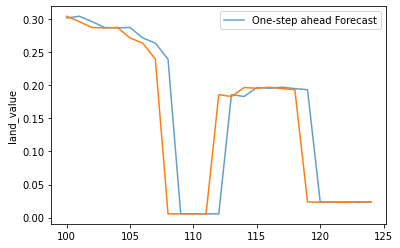

Test MSE: 0.00469


In [171]:
pred = results.get_prediction()

X = data_land['land_value']
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]
fig, ax = plt.subplots()
predic = pred.predicted_mean[size:len(X)]
predic.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

sns.lineplot(data=test, palette='blue', ax=ax)
# plt.plot(test)
# plt.plot(predictions, color='red')
plt.show()


error = mean_squared_error(test, predic)
print('Test MSE: %.5f' % error)


In [172]:
y_filtered = savgol_filter(data_land['land_value'], 60, 3)
model = sm.tsa.statespace.SARIMAX(y_filtered,exog=data_res['IRWR'], order=(2,1,2))
results=model.fit()
pred = results.get_prediction()

X = y_filtered
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]
test


d:\labs\аналіз даних\course work\dataaccessor\pyenv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
d:\labs\аналіз даних\course work\dataaccessor\pyenv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
d:\labs\аналіз даних\course work\dataaccessor\pyenv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


array([ 0.16332922,  0.16884768,  0.17392767,  0.17846854,  0.18236967,
        0.18553041,  0.18785015,  0.18922824,  0.18956406,  0.18875697,
        0.18670634,  0.18331153,  0.17847192,  0.17208687,  0.16405575,
        0.15427792,  0.14265276,  0.12907963,  0.1134579 ,  0.09568693,
        0.0756661 ,  0.05329476,  0.0284723 ,  0.00109807, -0.02892856])

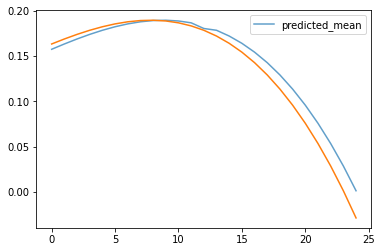

Test MSE: 0.00018


In [173]:
fig, ax = plt.subplots()
predic = pred.predicted_mean[size:len(X)]
predic = predic.reset_index()
predic = predic.drop(columns=['index'])
predic.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

sns.lineplot(data=test, palette='blue', ax=ax)
# plt.plot(test)
# plt.plot(predictions, color='red')
plt.show()


error = mean_squared_error(test, predic)
print('Test MSE: %.5f' % error)



d:\labs\аналіз даних\course work\dataaccessor\pyenv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
d:\labs\аналіз даних\course work\dataaccessor\pyenv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
d:\labs\аналіз даних\course work\dataaccessor\pyenv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
d:\labs\аналіз даних\course work\dataaccessor\pyenv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization fail

predicted=0.050297, expected=0.023153
Test MSE: 0.00491


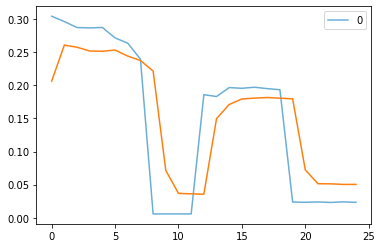

In [174]:
X = data_land['land_value']
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]
for t in range(len(test)):
    model = ARIMA(history, order=(2,1,1)) # p,d,q
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test.iloc[t]
    history.append(obs)

test = test.reset_index()
test = test.drop(columns=['index'])
print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test.values, predictions)
print('Test MSE: %.5f' % error)

# plot
fig, ax = plt.subplots()
sns.lineplot(data=test.values, palette='Blues', ax=ax)
sns.lineplot(data=predictions, palette='red', ax=ax)
# plt.plot(test)
# plt.plot(predictions, color='red')
plt.show()

In [175]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(data_res.Value.dropna())
print('p-value: ', result[1])

result = adfuller(data_res.Value.diff().dropna())
print('p-value: ', result[1])

result = adfuller(data_res.Value.diff().diff().dropna())
print('p-value: ', result[1])

p-value:  0.10054789677316794
p-value:  0.04504313662221407
p-value:  1.0011622088467377e-12


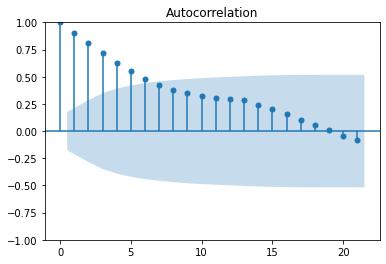

In [176]:
X = data_urban['Value']
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
acf = plot_acf(X)

d:\labs\аналіз даних\course work\dataaccessor\pyenv\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


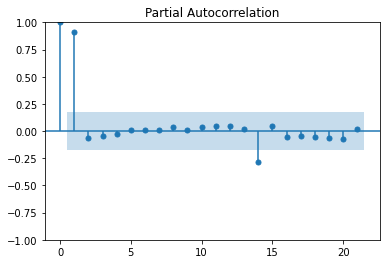

In [177]:
pacf = plot_pacf(X)

In [178]:
import statsmodels.api as sm
mod = sm.tsa.statespace.SARIMAX(data_urban['Value'], trend='c', order=(2,1,1))
res = mod.fit(disp=False)
print(res.summary())


                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                  125
Model:               SARIMAX(2, 1, 1)   Log Likelihood                 120.158
Date:                Sun, 19 Jun 2022   AIC                           -230.316
Time:                        18:08:47   BIC                           -216.215
Sample:                             0   HQIC                          -224.588
                                - 125                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0059      0.291      0.020      0.984      -0.564       0.576
ar.L1          0.0080     50.663      0.000      1.000     -99.290      99.306
ar.L2         -0.0079      0.700     -0.011      0.9

d:\labs\аналіз даних\course work\dataaccessor\pyenv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
d:\labs\аналіз даних\course work\dataaccessor\pyenv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


d:\labs\аналіз даних\course work\dataaccessor\pyenv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
d:\labs\аналіз даних\course work\dataaccessor\pyenv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


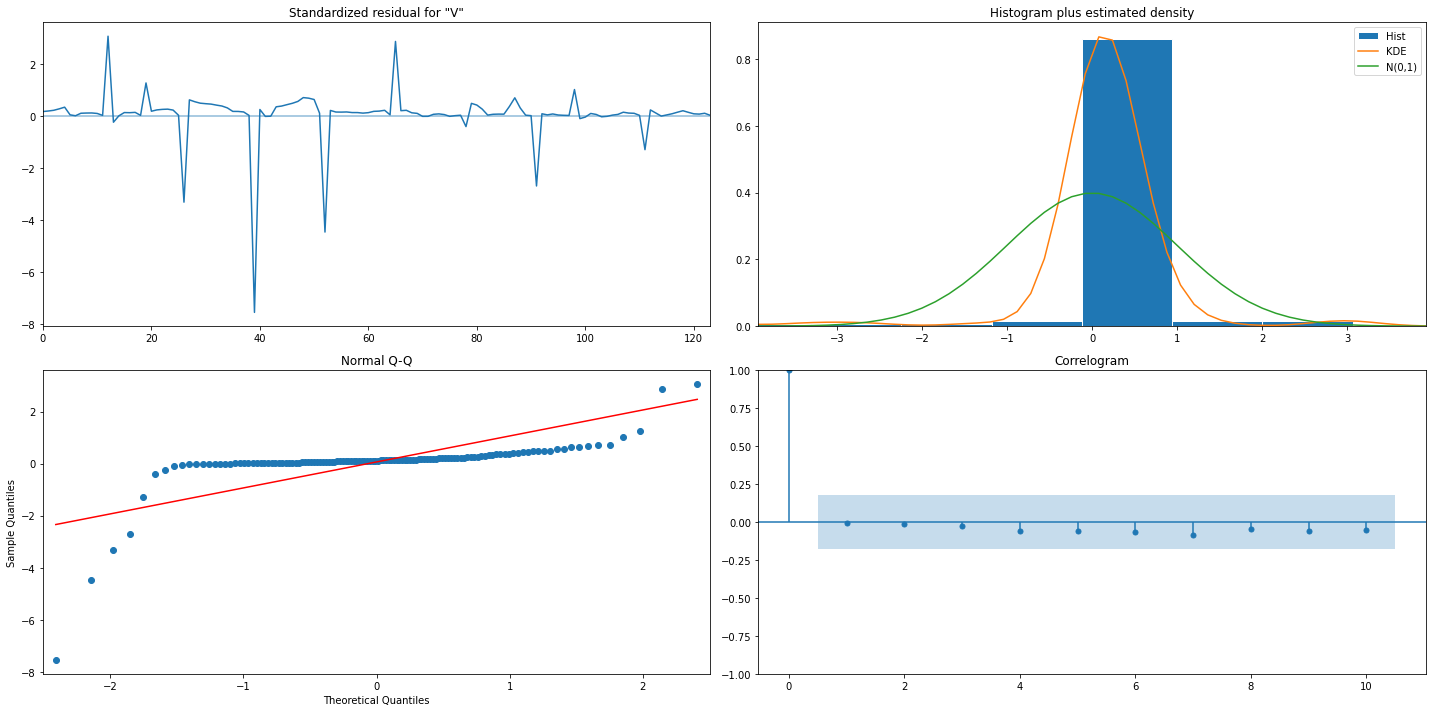

In [179]:
model = sm.tsa.statespace.SARIMAX(data_urban['Value'], order=(2,1,2))
results=model.fit()

# Create the 4 diagostics plots
results.plot_diagnostics(figsize=(20, 10));
plt.tight_layout();

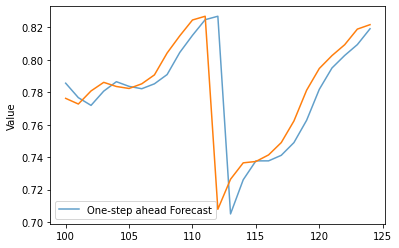

Test MSE: 0.00065


In [180]:
pred = results.get_prediction()

X = data_urban['Value']
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]
fig, ax = plt.subplots()
predic = pred.predicted_mean[size:len(X)]
predic.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

sns.lineplot(data=test, palette='blue', ax=ax)
# plt.plot(test)
# plt.plot(predictions, color='red')
plt.show()


error = mean_squared_error(test, predic)
print('Test MSE: %.5f' % error)


In [181]:
y_filtered = savgol_filter(data_urban['Value'], 60, 3)
model = sm.tsa.statespace.SARIMAX(y_filtered,exog=data_res['IRWR'], order=(2,1,2))
results=model.fit()
pred = results.get_prediction()

X = y_filtered
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]
test

d:\labs\аналіз даних\course work\dataaccessor\pyenv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


array([0.76815796, 0.76654913, 0.76497237, 0.7634688 , 0.76207953,
       0.76084571, 0.75980844, 0.75900887, 0.7584881 , 0.75828728,
       0.75844752, 0.75900996, 0.76001571, 0.7615059 , 0.76352166,
       0.76610411, 0.76929438, 0.77313359, 0.77766287, 0.78292335,
       0.78895615, 0.7958024 , 0.80350322, 0.81209973, 0.82163307])

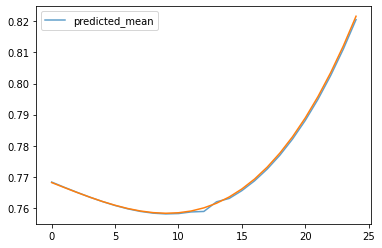

Test MSE: 0.00000


In [182]:
fig, ax = plt.subplots()
predic = pred.predicted_mean[size:len(X)]
predic = predic.reset_index()
predic = predic.drop(columns=['index'])
predic.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

sns.lineplot(data=test, palette='blue', ax=ax)
# plt.plot(test)
# plt.plot(predictions, color='red')
plt.show()

error = mean_squared_error(test, predic)
print('Test MSE: %.5f' % error)

d:\labs\аналіз даних\course work\dataaccessor\pyenv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
d:\labs\аналіз даних\course work\dataaccessor\pyenv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


predicted=0.819160, expected=0.821736
Test MSE: 0.00065


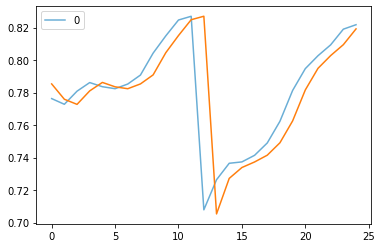

In [183]:
X = data_urban['Value']
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]
for t in range(len(test)):
    model = ARIMA(history, order=(2,1,1)) # p,d,q
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test.iloc[t]
    history.append(obs)

test = test.reset_index()
test = test.drop(columns=['index'])
print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test.values, predictions)
print('Test MSE: %.5f' % error)

# plot
fig, ax = plt.subplots()
sns.lineplot(data=test.values, palette='Blues', ax=ax)
sns.lineplot(data=predictions, palette='red', ax=ax)
# plt.plot(test)
# plt.plot(predictions, color='red')
plt.show()

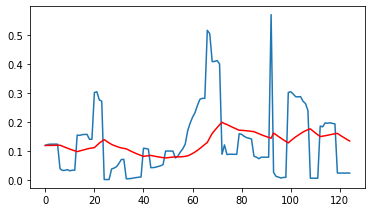

In [184]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing

m = 12
alpha = 1/(2*m)
y_filtered = SimpleExpSmoothing(data_land['land_value']).fit(smoothing_level=alpha,optimized=False,use_brute=True).fittedvalues
# y_filtered = savgol_filter(data_land['land_value'], 60, 3)
fig = plt.figure()
ax = fig.subplots()
p = ax.plot(data_land.index, data_land['land_value'])
p, = ax.plot(data_land.index, y_filtered, 'r')
plt.subplots_adjust(bottom=0.25)

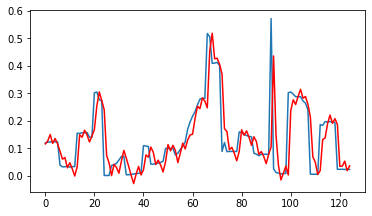

In [185]:
y_filtered = ExponentialSmoothing(data_land['land_value'],trend='add',seasonal='add',seasonal_periods=6).fit().fittedvalues
# y_filtered = savgol_filter(data_land['land_value'], 60, 3)
fig = plt.figure()
ax = fig.subplots()
p = ax.plot(data_land.index, data_land['land_value'])
p, = ax.plot(data_land.index, y_filtered, 'r')
plt.subplots_adjust(bottom=0.25)

Test MSE: 0.011


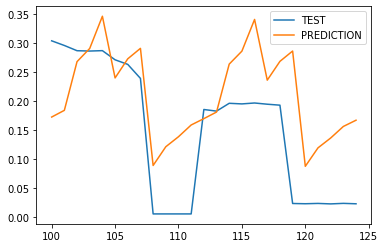

In [186]:
X = data_land['land_value']
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]

fitted_model = ExponentialSmoothing(train,trend='mul',seasonal='mul',seasonal_periods=12).fit()
test_predictions = fitted_model.forecast(len(test))

test.plot(legend=True,label='TEST')
test_predictions.plot(legend=True,label='PREDICTION')

test = test.reset_index()
test = test.drop(columns=['index'])
error = mean_squared_error(test.values, test_predictions)
print('Test MSE: %.3f' % error)


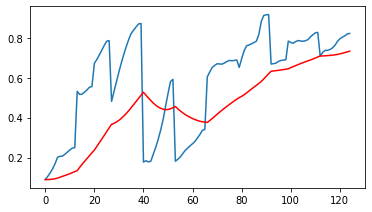

In [187]:
m = 12
alpha = 1/(2*m)
y_filtered = SimpleExpSmoothing(data_urban['Value']).fit(smoothing_level=alpha,optimized=False,use_brute=True).fittedvalues
# y_filtered = savgol_filter(data_land['land_value'], 60, 3)
fig = plt.figure()
ax = fig.subplots()
p = ax.plot(data_urban.index, data_urban['Value'])
p, = ax.plot(data_urban.index, y_filtered, 'r')
plt.subplots_adjust(bottom=0.25)

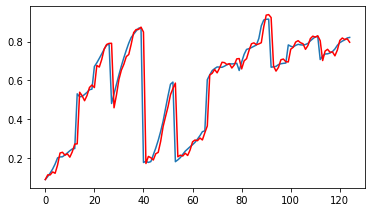

In [188]:
y_filtered = ExponentialSmoothing(data_urban['Value'],trend='add',seasonal='add',seasonal_periods=6).fit().fittedvalues
# y_filtered = savgol_filter(data_land['land_value'], 60, 3)
fig = plt.figure()
ax = fig.subplots()
p = ax.plot(data_urban.index, data_urban['Value'])
p, = ax.plot(data_urban.index, y_filtered, 'r')
plt.subplots_adjust(bottom=0.25)

Test MSE: 0.005


d:\labs\аналіз даних\course work\dataaccessor\pyenv\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


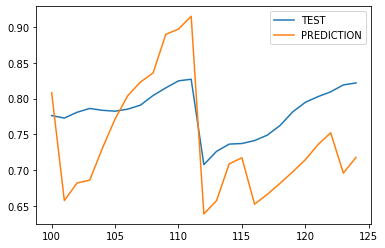

In [189]:
X = data_urban['Value']
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]

fitted_model = ExponentialSmoothing(train,trend='mul',seasonal='mul',seasonal_periods=24).fit()
test_predictions = fitted_model.forecast(len(test))

test.plot(legend=True,label='TEST',figsize=(6,4))
test_predictions.plot(legend=True,label='PREDICTION')

test = test.reset_index()
test = test.drop(columns=['index'])
error = mean_squared_error(test.values, test_predictions)
print('Test MSE: %.3f' % error)